In [363]:
import cv2         
import numpy as np
from matplotlib import pyplot as plt
import os

<Figure size 432x288 with 0 Axes>

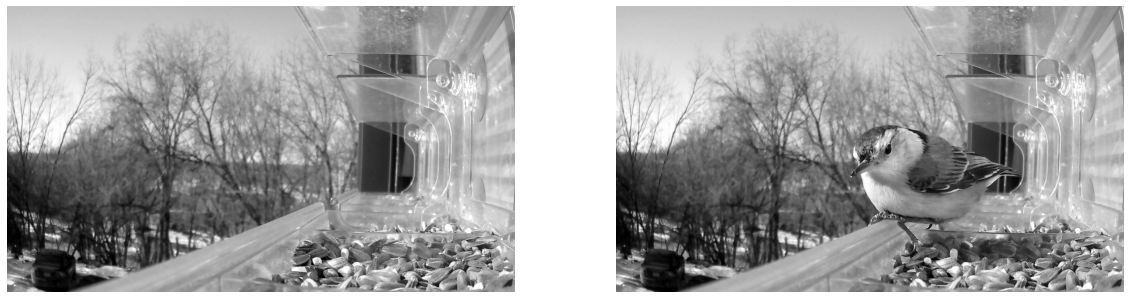

In [645]:
rootpath = r"C:\Users\Vedant Gannu\Documents\CSCI-4270-Computational_Vision\hw3\prob3_distribute\{}".format("pos_0")
images = [image for image in os.listdir(rootpath) if os.path.splitext(image)[1] == ".jpg"]
im0 = cv2.imread(os.path.join(rootpath, images[0]), cv2.IMREAD_GRAYSCALE).astype(float)
im1 = cv2.imread(os.path.join(rootpath, images[1]), cv2.IMREAD_GRAYSCALE).astype(float)

#center = (im1.shape[1]//2, im1.shape[0]*3//4)

#im1 = cv2.line(im1, center, (im1.shape[1]//2, im1.shape[1]-1), 255, 19)


plt.gray()
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.axis("off")
plt.imshow(im0)
plt.subplot(122)
plt.axis("off")
plt.imshow(im1)
plt.show()  

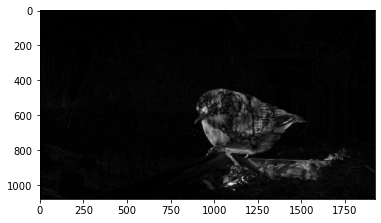

255.0 8.716191165123456 20.50548322292698 49.727157610977414


In [646]:
im_diff = np.abs(im0 - im1)
plt.imshow(im_diff)
plt.show()
max_diff = np.max(im_diff)
mean = np.average(im_diff)
std = np.std(im_diff)
thresh = mean + 2*std
print(max_diff, mean, std, thresh)

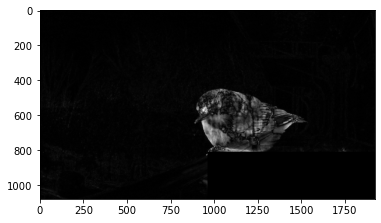

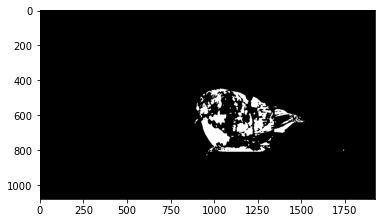

In [647]:
#Black out the foreground seed holder since seed distortion shouldn't be considered
im_diff[im1.shape[0]*3//4:im1.shape[0], im1.shape[1]//2:im1.shape[1]] = 0
plt.imshow(im_diff)
plt.show()

im_diff = cv2.medianBlur(im_diff.astype("uint8"), ksize=5)


retval,im_thresh = cv2.threshold(im_diff.astype(np.uint8),thresh,255,cv2.THRESH_BINARY)
plt.imshow(im_thresh)
plt.show()

Text(0.5, 1.0, 'Close')

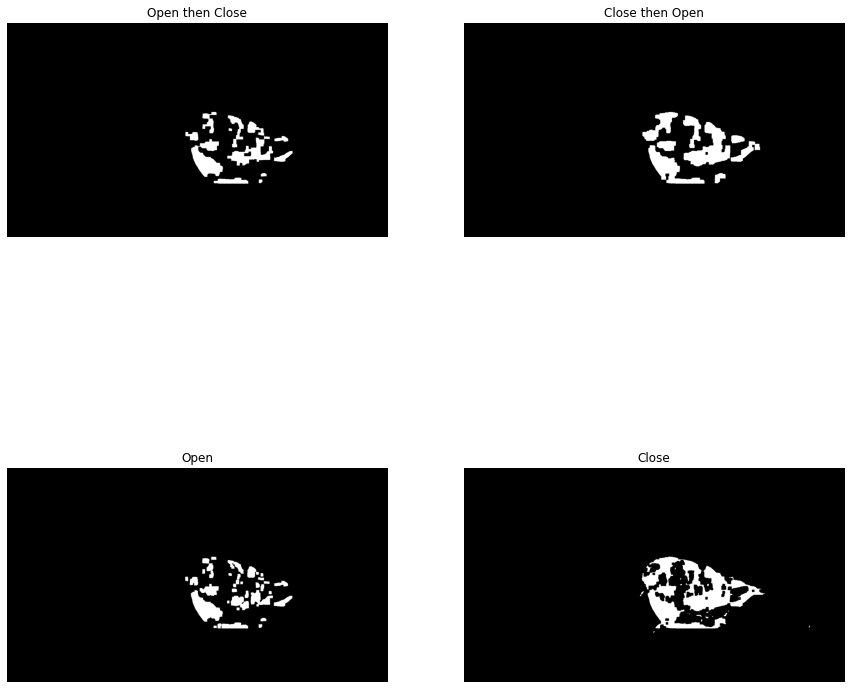

In [648]:
kernel = np.ones((12,12),np.uint8)

after_open = cv2.morphologyEx(im_thresh,cv2.MORPH_OPEN,kernel)
im_open_first = cv2.morphologyEx(after_open,cv2.MORPH_CLOSE,kernel)

after_close = cv2.morphologyEx(im_thresh,cv2.MORPH_CLOSE,kernel)
im_close_first = cv2.morphologyEx(after_close,cv2.MORPH_OPEN,kernel)



im_close_first = cv2.morphologyEx(im_close_first,cv2.MORPH_OPEN,np.ones((15,15),np.uint8))


plt.figure(figsize=(15,15))
plt.subplot(221)
plt.axis("off")
plt.imshow(im_open_first)
plt.title("Open then Close")
plt.subplot(222)
plt.axis("off")
plt.imshow(im_close_first)
plt.title("Close then Open")


plt.subplot(223)
plt.axis("off")
plt.imshow(after_open)
plt.title("Open")
plt.subplot(224)
plt.axis("off")
plt.imshow(after_close)
plt.title("Close")


Text(0.5, 1.0, 'Close')

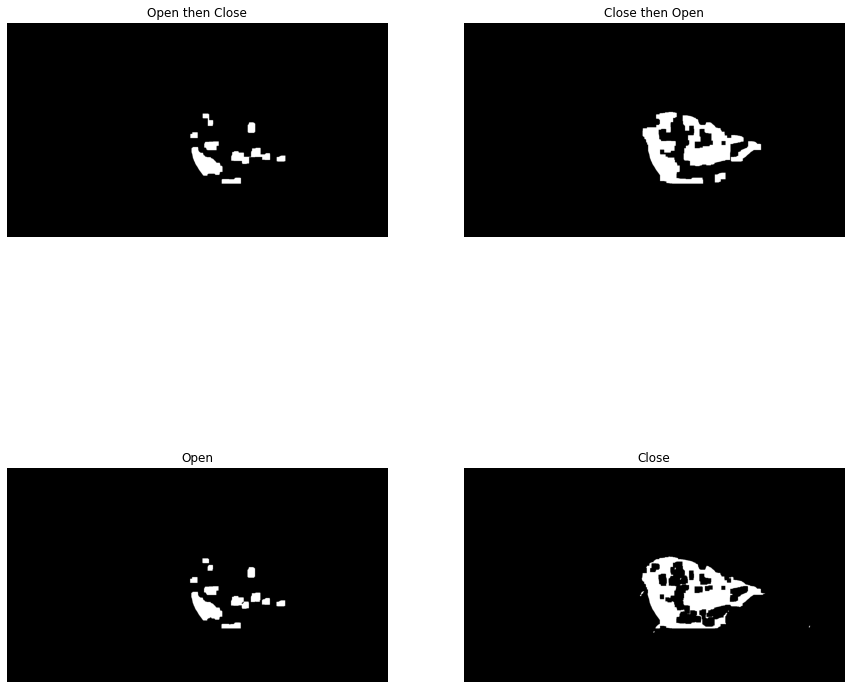

In [392]:
kernel = np.ones((20,20),np.uint8)

after_open = cv2.morphologyEx(im_thresh,cv2.MORPH_OPEN,kernel)
im_open_first = cv2.morphologyEx(after_open,cv2.MORPH_CLOSE,kernel)

after_close = cv2.morphologyEx(im_thresh,cv2.MORPH_CLOSE,kernel)
im_close_first = cv2.morphologyEx(after_close,cv2.MORPH_OPEN,kernel)

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.axis("off")
plt.imshow(im_open_first)
plt.title("Open then Close")
plt.subplot(222)
plt.axis("off")
plt.imshow(im_close_first)
plt.title("Close then Open")


plt.subplot(223)
plt.axis("off")
plt.imshow(after_open)
plt.title("Open")
plt.subplot(224)
plt.axis("off")
plt.imshow(after_close)
plt.title("Close")

In [649]:
'''
The next step is connected components labeling.  This function
returns four values as demonstrated in the code and output below.
'''
connectivity = 8
num_labels, labels, stats, centroids = \
    cv2.connectedComponentsWithStats(im_close_first, connectivity, cv2.CV_32S)#cv2.connectedComponentsWithStats(im_open_first, connectivity, cv2.CV_32S)
print('Number of connected components:', num_labels-1)  # the background is one of the "labels"
print('\nHere are the stats:')
print('Upper left and lower right pixel, plus area')
print(stats)
print('\nHere are the centroids')
print(centroids)

Number of connected components: 8

Here are the stats:
Upper left and lower right pixel, plus area
[[      0       0    1920    1080 2001042]
 [    899     452     179     145   10534]
 [   1104     470      91     163    6599]
 [   1107     502     235     223   23612]
 [   1347     569      67      40    2184]
 [    972     597      96      51    3852]
 [   1344     599     148     103    5283]
 [    929     619     283     193   18683]
 [   1264     759      54      51    1811]]

Here are the centroids
[[ 952.60741804  535.90588503]
 [ 990.25735713  520.74093412]
 [1154.0433399   536.70571299]
 [1240.33732848  637.45565814]
 [1376.42216117  588.15979853]
 [1022.03738318  619.80711319]
 [1420.96611774  652.66837024]
 [1032.90279934  734.55703046]
 [1286.75759249  781.00110436]]


In [650]:
colors = np.random.randint(255, size=(num_labels,3))
colors[0] = np.array((0,0,0))
print(colors)

[[  0   0   0]
 [173  58 153]
 [144 248   6]
 [ 51 214  63]
 [150  78 189]
 [193 208  16]
 [148 110 194]
 [ 38 202 165]
 [ 87  78  71]]


(1080, 1920, 3) int32
4.885830436432275
4.499843584791139
[534.73287912 395.55148688 263.88772671 230.77091796 459.20157149
 158.47880109 414.02870968 155.96208324]
[ 35.8666876  194.07130155 296.79390668 419.19778448 101.08319458
 474.53548166 207.76731276 406.0197736 ]

[2001042   10534    6599   23612    2184    3852    5283   18683    1811]
[0, 1, 2, 3, 6, 7]
3.303854452318691
2.5478277957541167


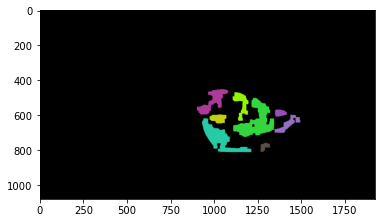

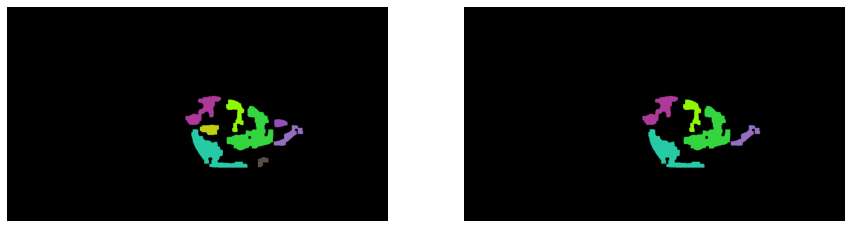

In [651]:
'''
Finally, we will generate the colorized image.  We have not yet discussed this
way of indexing a Numpy array.
'''

im_colored = colors[labels]
print(im_colored.shape, im_colored.dtype)
#plt.imshow(im_colored[:,im_colored.shape[1]//2:].astype(np.uint8))
plt.imshow(im_colored.astype(np.uint8))

lower_right_center_coords = np.tile(np.array([im_colored.shape[1]*3//4, im_colored.shape[0]*3//4]), (len(centroids), 1))
optical_center = np.tile(np.array([im_colored.shape[1]//2, im_colored.shape[0]//2]), (len(centroids), 1))

#print(np.square(np.sum(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)))
distances = np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)
to_right = np.sum(distances) / np.max(distances)
print(to_right)
distances = np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1)
to_center = np.sum(distances) / np.max(distances)
print(to_center)

print(np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1))
print(np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1))
print()

if to_right > to_center:

    pixel_ids, pixel_counts = np.unique(labels, return_counts=True)
    print(pixel_counts)
    ls = np.argwhere(pixel_counts > 4000).flatten().tolist()
    print(ls)

    for i in list(set(pixel_ids) - set(ls)):
        labels[np.where(labels == i)] = 0

    im_colored1 = colors[labels]

    plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.axis("off")
    plt.imshow(im_colored)
    plt.subplot(222)
    plt.axis("off")
    plt.imshow(im_colored1)


    new_slice = np.array(list(set(ls) - set([0])), dtype="int")

    distances = np.linalg.norm(centroids[new_slice,:] - lower_right_center_coords[new_slice,:], axis=1)
    print(np.sum(distances) / np.max(distances))
    distances = np.linalg.norm(centroids[new_slice,:] - optical_center[new_slice,:], axis=1)
    print(np.sum(distances) / np.max(distances))



#centroids - lower_right


#cv2.imshow("image", im_colored.astype("uint8"))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

    plt.show()

array([ 1,  1,  1, ..., 75, 75, 75], dtype=int32)

<Figure size 432x288 with 0 Axes>

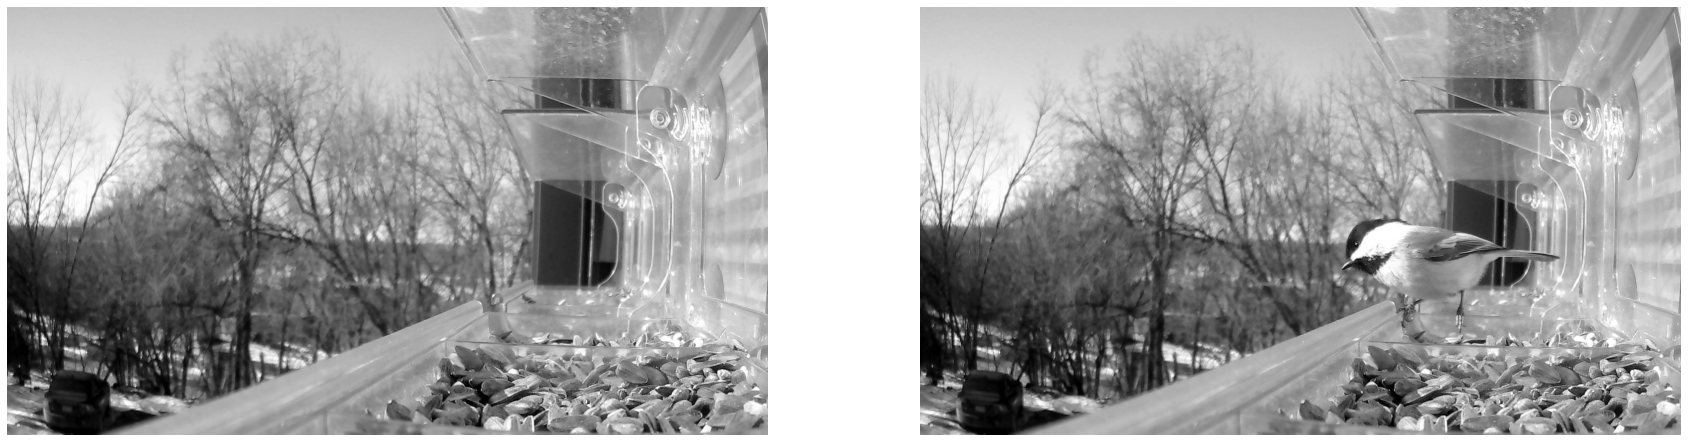

In [652]:
rootpath = r"C:\Users\Vedant Gannu\Documents\CSCI-4270-Computational_Vision\hw3\prob3_distribute\{}".format("pos_1")
images = [image for image in os.listdir(rootpath) if os.path.splitext(image)[1] == ".jpg"]
im0 = cv2.imread(os.path.join(rootpath, images[0]), cv2.IMREAD_GRAYSCALE).astype(float)
im1 = cv2.imread(os.path.join(rootpath, images[1]), cv2.IMREAD_GRAYSCALE).astype(float)
plt.gray()
plt.figure(figsize=(30,30))
plt.subplot(121)
plt.axis("off")
plt.imshow(im0)
plt.subplot(122)
plt.axis("off")
plt.imshow(im1)
plt.show()  

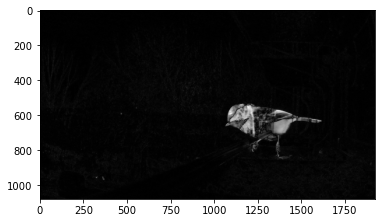

200.0 5.17602382330247 14.569664589224006 34.31535300175048


In [653]:
im_diff = np.abs(im0 - im1)
plt.imshow(im_diff)
plt.show()
max_diff = np.max(im_diff)
mean = np.average(im_diff)
std = np.std(im_diff)
thresh = mean + 2*std
print(max_diff, mean, std, thresh)

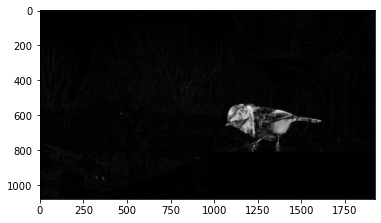

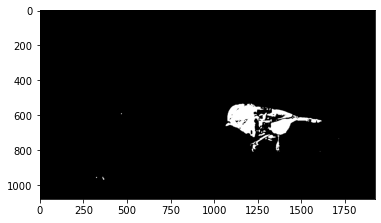

In [654]:
#Black out the foreground seed holder since seed distortion shouldn't be considered
im_diff[im1.shape[0]*3//4:im1.shape[0], im1.shape[1]//2:im1.shape[1]] = 0
plt.imshow(im_diff)
plt.show()

im_diff = cv2.medianBlur(im_diff.astype("uint8"), ksize=5)

retval,im_thresh = cv2.threshold(im_diff.astype(np.uint8),thresh,255,cv2.THRESH_BINARY)
plt.imshow(im_thresh)
plt.show()

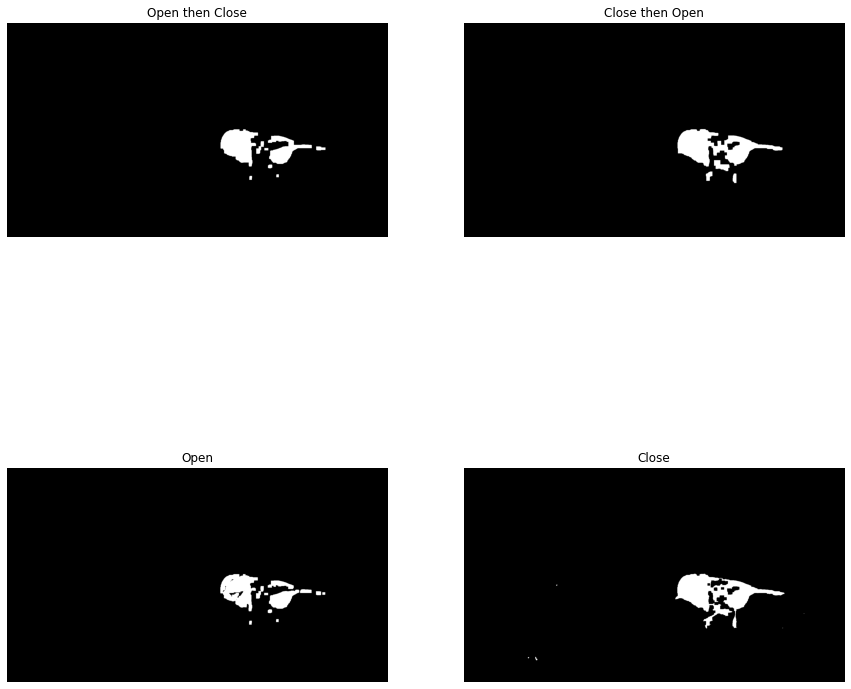

In [655]:
kernel = np.ones((12,12),np.uint8)

after_open = cv2.morphologyEx(im_thresh,cv2.MORPH_OPEN,kernel)
im_open_first = cv2.morphologyEx(after_open,cv2.MORPH_CLOSE,kernel)

after_close = cv2.morphologyEx(im_thresh,cv2.MORPH_CLOSE,kernel)
im_close_first = cv2.morphologyEx(after_close,cv2.MORPH_OPEN,kernel)

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.axis("off")
plt.imshow(im_open_first)
plt.title("Open then Close")
plt.subplot(222)
plt.axis("off")
plt.imshow(im_close_first)
plt.title("Close then Open")


plt.subplot(223)
plt.axis("off")
plt.imshow(after_open)
plt.title("Open")
plt.subplot(224)
plt.axis("off")
plt.imshow(after_close)
plt.title("Close")


plt.show() 

In [656]:
'''
The next step is connected components labeling.  This function
returns four values as demonstrated in the code and output below.
'''
connectivity = 8
num_labels, labels, stats, centroids = \
    cv2.connectedComponentsWithStats(im_close_first, connectivity, cv2.CV_32S)#cv2.connectedComponentsWithStats(im_open_first, connectivity, cv2.CV_32S)
print('Number of connected components:', num_labels-1)  # the background is one of the "labels"
print('\nHere are the stats:')
print('Upper left and lower right pixel, plus area')
print(stats)
print('\nHere are the centroids')
print(centroids)

Number of connected components: 4

Here are the stats:
Upper left and lower right pixel, plus area
[[      0       0    1920    1080 2025254]
 [   1076     538     529     188   43917]
 [   1260     694      78      55    2549]
 [   1219     751      33      47    1075]
 [   1354     761      19      48     805]]

Here are the centroids
[[ 952.04477364  537.15824879]
 [1269.65844662  626.72955803]
 [1295.63122793  721.52608866]
 [1234.05674419  772.53581395]
 [1363.91180124  784.57142857]]


In [657]:
colors = np.random.randint(255, size=(num_labels,3))
colors[0] = np.array((0,0,0))

(1080, 1920, 3) int32
2.8339508899653723
3.25031243484324
[250.20851246 169.32210528 209.32317084  80.22484799]
[321.57482768 381.57573564 359.41619858 472.18632642]



'\nFinally, we will generate the colorized image.  We have not yet discussed this\nway of indexing a Numpy array.\n\nim_colored = colors[labels]\nprint(im_colored.shape, im_colored.dtype)\nplt.imshow(im_colored.astype(np.uint8))\n\n\nlower_right_center_coords = np.tile(np.array([im_colored.shape[1]*3//4, im_colored.shape[0]*3//4]), (len(centroids), 1))\noptical_center = np.tile(np.array([im_colored.shape[1]//2, im_colored.shape[0]//2]), (len(centroids), 1))\n\n#print(np.square(np.sum(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)))\ndistances = np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)\nprint(np.sum(distances) / np.max(distances))\ndistances = np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1)\nprint(np.sum(distances) / np.max(distances))\n\nprint(np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1))\nprint(np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1))\n\n\nplt.show()\n'

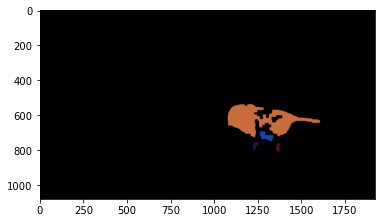

In [658]:
'''
Finally, we will generate the colorized image.  We have not yet discussed this
way of indexing a Numpy array.
'''

im_colored = colors[labels]
print(im_colored.shape, im_colored.dtype)
#plt.imshow(im_colored[:,im_colored.shape[1]//2:].astype(np.uint8))
plt.imshow(im_colored.astype(np.uint8))

lower_right_center_coords = np.tile(np.array([im_colored.shape[1]*3//4, im_colored.shape[0]*3//4]), (len(centroids), 1))
optical_center = np.tile(np.array([im_colored.shape[1]//2, im_colored.shape[0]//2]), (len(centroids), 1))

#print(np.square(np.sum(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)))
distances = np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)
to_right = np.sum(distances) / np.max(distances)
print(to_right)
distances = np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1)
to_center = np.sum(distances) / np.max(distances)
print(to_center)

print(np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1))
print(np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1))
print()

if to_right > to_center:

    pixel_ids, pixel_counts = np.unique(labels, return_counts=True)
    print(pixel_counts)
    ls = np.argwhere(pixel_counts > 4000).flatten().tolist()
    print(ls)

    for i in list(set(pixel_ids) - set(ls)):
        labels[np.where(labels == i)] = 0

    im_colored1 = colors[labels]

    plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.axis("off")
    plt.imshow(im_colored)
    plt.subplot(222)
    plt.axis("off")
    plt.imshow(im_colored1)


    new_slice = np.array(list(set(ls) - set([0])), dtype="int")

    distances = np.linalg.norm(centroids[new_slice,:] - lower_right_center_coords[new_slice,:], axis=1)
    print(np.sum(distances) / np.max(distances))
    distances = np.linalg.norm(centroids[new_slice,:] - optical_center[new_slice,:], axis=1)
    print(np.sum(distances) / np.max(distances))



#centroids - lower_right


#cv2.imshow("image", im_colored.astype("uint8"))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

    plt.show()
'''
Finally, we will generate the colorized image.  We have not yet discussed this
way of indexing a Numpy array.

im_colored = colors[labels]
print(im_colored.shape, im_colored.dtype)
plt.imshow(im_colored.astype(np.uint8))


lower_right_center_coords = np.tile(np.array([im_colored.shape[1]*3//4, im_colored.shape[0]*3//4]), (len(centroids), 1))
optical_center = np.tile(np.array([im_colored.shape[1]//2, im_colored.shape[0]//2]), (len(centroids), 1))

#print(np.square(np.sum(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)))
distances = np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)
print(np.sum(distances) / np.max(distances))
distances = np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1)
print(np.sum(distances) / np.max(distances))

print(np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1))
print(np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1))


plt.show()
'''

<Figure size 432x288 with 0 Axes>

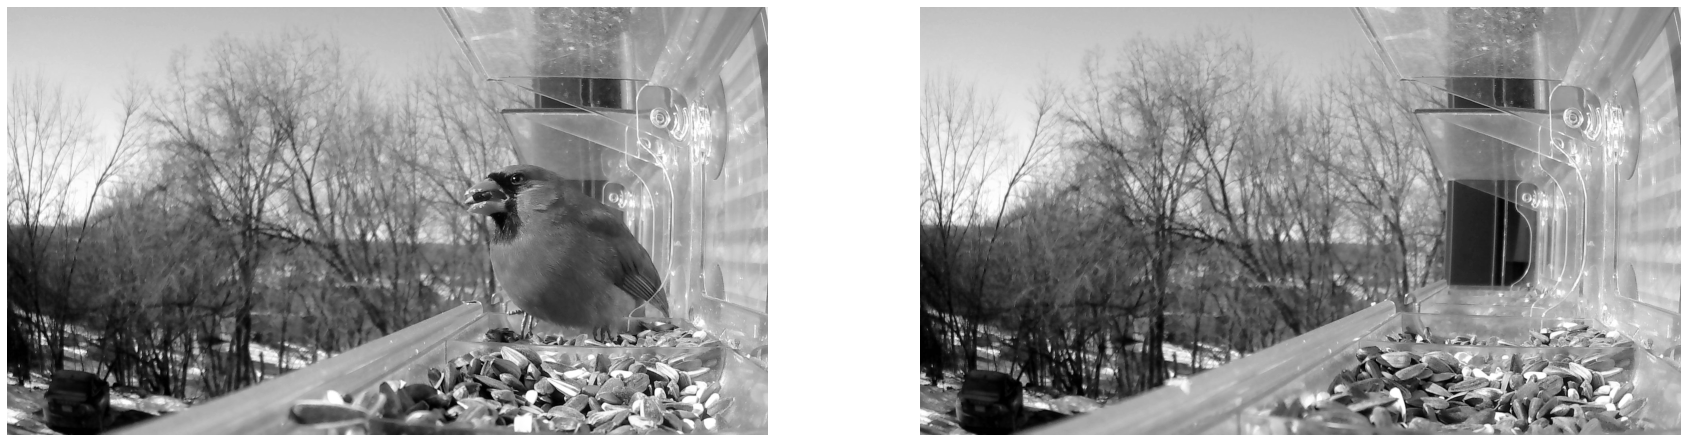

In [659]:
rootpath = r"C:\Users\Vedant Gannu\Documents\CSCI-4270-Computational_Vision\hw3\prob3_distribute\{}".format("pos_4")
images = [image for image in os.listdir(rootpath) if os.path.splitext(image)[1] == ".jpg"]
im0 = cv2.imread(os.path.join(rootpath, images[0]), cv2.IMREAD_GRAYSCALE).astype(float)
im1 = cv2.imread(os.path.join(rootpath, images[1]), cv2.IMREAD_GRAYSCALE).astype(float)
plt.gray()
plt.figure(figsize=(30,30))
plt.subplot(121)
plt.axis("off")
plt.imshow(im0)
plt.subplot(122)
plt.axis("off")
plt.imshow(im1)
plt.show()  

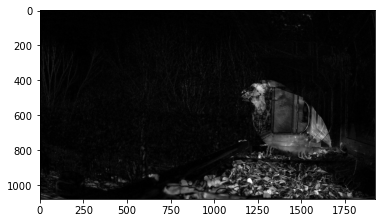

255.0 14.742663966049383 27.708053260247805 70.158770486545


In [660]:
im_diff = np.abs(im0 - im1)
plt.imshow(im_diff)
plt.show()
max_diff = np.max(im_diff)
mean = np.average(im_diff)
std = np.std(im_diff)
thresh = mean + 2*std
print(max_diff, mean, std, thresh)

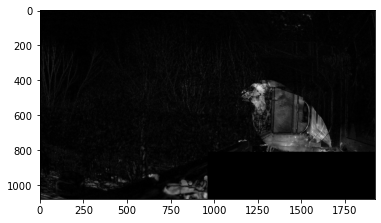

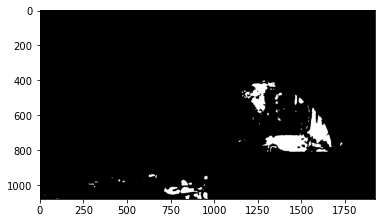

In [661]:
#Black out the foreground seed holder since seed distortion shouldn't be considered
im_diff[im1.shape[0]*3//4:im1.shape[0], im1.shape[1]//2:im1.shape[1]] = 0
plt.imshow(im_diff)
plt.show()

im_diff = cv2.medianBlur(im_diff.astype("uint8"), ksize=7)

retval,im_thresh = cv2.threshold(im_diff.astype(np.uint8),thresh,255,cv2.THRESH_BINARY)
plt.imshow(im_thresh)
plt.show()

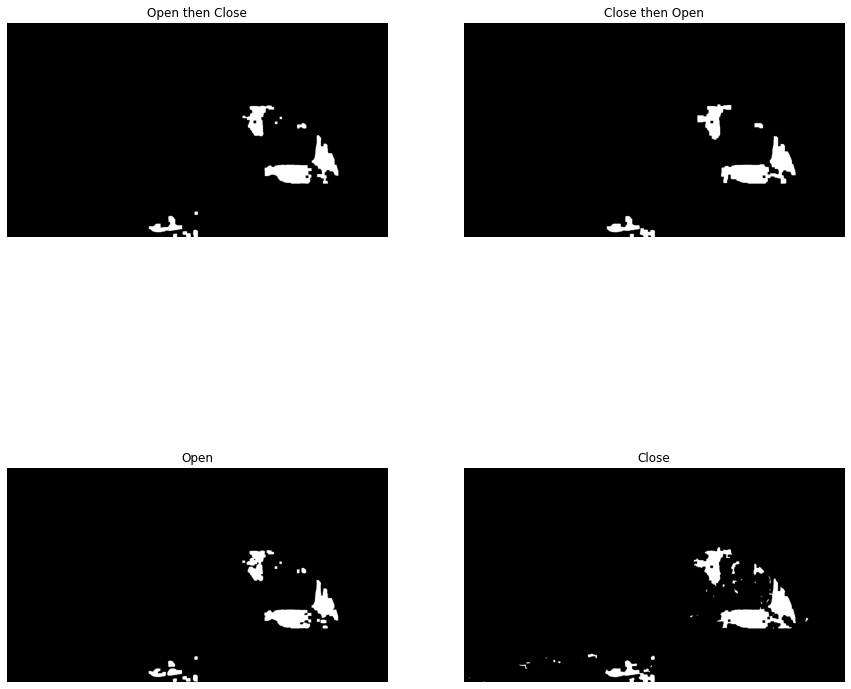

In [662]:
kernel = np.ones((12,12),np.uint8)

after_open = cv2.morphologyEx(im_thresh,cv2.MORPH_OPEN,kernel)
im_open_first = cv2.morphologyEx(after_open,cv2.MORPH_CLOSE,kernel)

after_close = cv2.morphologyEx(im_thresh,cv2.MORPH_CLOSE,kernel)
im_close_first = cv2.morphologyEx(after_close,cv2.MORPH_OPEN,kernel)


im_close_first = cv2.morphologyEx(im_close_first,cv2.MORPH_OPEN,np.ones((15,15),np.uint8))

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.axis("off")
plt.imshow(im_open_first)
plt.title("Open then Close")
plt.subplot(222)
plt.axis("off")
plt.imshow(im_close_first)
plt.title("Close then Open")


plt.subplot(223)
plt.axis("off")
plt.imshow(after_open)
plt.title("Open")
plt.subplot(224)
plt.axis("off")
plt.imshow(after_close)
plt.title("Close")


plt.show() 

In [663]:
'''
The next step is connected components labeling.  This function
returns four values as demonstrated in the code and output below.
'''
connectivity = 8
num_labels, labels, stats, centroids = \
    cv2.connectedComponentsWithStats(im_open_first, connectivity, cv2.CV_32S)
    #cv2.connectedComponentsWithStats(im_close_first[:,im1.shape[1]//3:im1.shape[1]], connectivity, cv2.CV_32S)
print('Number of connected components:', num_labels-1)  # the background is one of the "labels"
print('\nHere are the stats:')
print('Upper left and lower right pixel, plus area')
print(stats)
print('\nHere are the centroids')
print(centroids)

Number of connected components: 11

Here are the stats:
Upper left and lower right pixel, plus area
[[      0       0    1920    1080 2021857]
 [   1187     419     159     155   10826]
 [   1374     476      12      12     144]
 [   1350     500      13      13     167]
 [   1462     508      47      27     940]
 [   1536     569     134     243   14377]
 [   1298     717     237      95   17341]
 [    945     952      17      17     277]
 [    715     974     168      82    5758]
 [    938    1044      24      36     798]
 [    885    1051      41      29     786]
 [    837    1063      20      17     329]]

Here are the centroids
[[ 949.51832152  534.85414053]
 [1260.9965823   488.05837798]
 [1379.5         481.5       ]
 [1356.          506.        ]
 [1485.86276596  522.34893617]
 [1598.68859985  694.51825833]
 [1426.32754743  760.17103973]
 [ 953.04693141  960.10108303]
 [ 803.23706148 1026.36887808]
 [ 949.80701754 1061.8283208 ]
 [ 905.50636132 1065.22773537]
 [ 846.73556231 10

In [664]:
colors = np.random.randint(255, size=(num_labels,3))
colors[0] = np.array((0,0,0))

(1080, 1920, 3) int32
6.7369266204187666
8.141297825761145
[368.35937824 334.02469969 315.39181981 291.28427322 196.26029752
  51.67070002 509.56219065 672.5195397  551.09587479 592.30452192
 648.24149421]
[305.44537098 423.55932288 397.4569159  526.1589196  657.11416035
 515.69047716 420.15861901 511.00812563 521.92786214 528.04709133
 543.19521994]



'\nFinally, we will generate the colorized image.  We have not yet discussed this\nway of indexing a Numpy array.\n\nim_colored = colors[labels]\nprint(im_colored.shape, im_colored.dtype)\n\n\n\n\n\nlower_right_center_coords = np.tile(np.array([im_colored.shape[1]*3//4, im_colored.shape[0]*3//4]), (len(centroids), 1))\noptical_center = np.tile(np.array([im_colored.shape[1], im_colored.shape[0]]), (len(centroids), 1))\n\n#print(np.square(np.sum(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)))\ndistances = np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)\nprint(np.sum(distances) / np.max(distances))\ndistances = np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1)\nprint(np.sum(distances) / np.max(distances))\n\nprint(np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1))\nprint(np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1))\n\n\n\nplt.imshow(im_colored.astype(np.uint8))\nplt.show()\n'

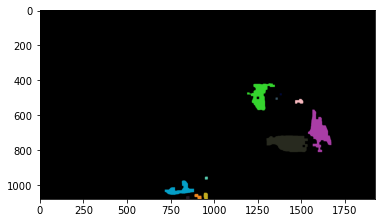

In [665]:
'''
Finally, we will generate the colorized image.  We have not yet discussed this
way of indexing a Numpy array.
'''

im_colored = colors[labels]
print(im_colored.shape, im_colored.dtype)
#plt.imshow(im_colored[:,im_colored.shape[1]//2:].astype(np.uint8))
plt.imshow(im_colored.astype(np.uint8))

lower_right_center_coords = np.tile(np.array([im_colored.shape[1]*3//4, im_colored.shape[0]*3//4]), (len(centroids), 1))
optical_center = np.tile(np.array([im_colored.shape[1]//2, im_colored.shape[0]//2]), (len(centroids), 1))

#print(np.square(np.sum(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)))
distances = np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)
to_right = np.sum(distances) / np.max(distances)
print(to_right)
distances = np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1)
to_center = np.sum(distances) / np.max(distances)
print(to_center)

print(np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1))
print(np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1))
print()

if to_right > to_center:

    pixel_ids, pixel_counts = np.unique(labels, return_counts=True)
    print(pixel_counts)
    ls = np.argwhere(pixel_counts > 4000).flatten().tolist()
    print(ls)

    for i in list(set(pixel_ids) - set(ls)):
        labels[np.where(labels == i)] = 0

    im_colored1 = colors[labels]

    plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.axis("off")
    plt.imshow(im_colored)
    plt.subplot(222)
    plt.axis("off")
    plt.imshow(im_colored1)


    new_slice = np.array(list(set(ls) - set([0])), dtype="int")

    distances = np.linalg.norm(centroids[new_slice,:] - lower_right_center_coords[new_slice,:], axis=1)
    print(np.sum(distances) / np.max(distances))
    distances = np.linalg.norm(centroids[new_slice,:] - optical_center[new_slice,:], axis=1)
    print(np.sum(distances) / np.max(distances))



#centroids - lower_right


#cv2.imshow("image", im_colored.astype("uint8"))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

    plt.show()
'''
Finally, we will generate the colorized image.  We have not yet discussed this
way of indexing a Numpy array.

im_colored = colors[labels]
print(im_colored.shape, im_colored.dtype)





lower_right_center_coords = np.tile(np.array([im_colored.shape[1]*3//4, im_colored.shape[0]*3//4]), (len(centroids), 1))
optical_center = np.tile(np.array([im_colored.shape[1], im_colored.shape[0]]), (len(centroids), 1))

#print(np.square(np.sum(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)))
distances = np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)
print(np.sum(distances) / np.max(distances))
distances = np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1)
print(np.sum(distances) / np.max(distances))

print(np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1))
print(np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1))



plt.imshow(im_colored.astype(np.uint8))
plt.show()
'''

In [216]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [6, 6, 0, ..., 0, 0, 0],
       [6, 6, 0, ..., 0, 0, 0],
       [6, 6, 0, ..., 0, 0, 0]], dtype=int32)

<Figure size 432x288 with 0 Axes>

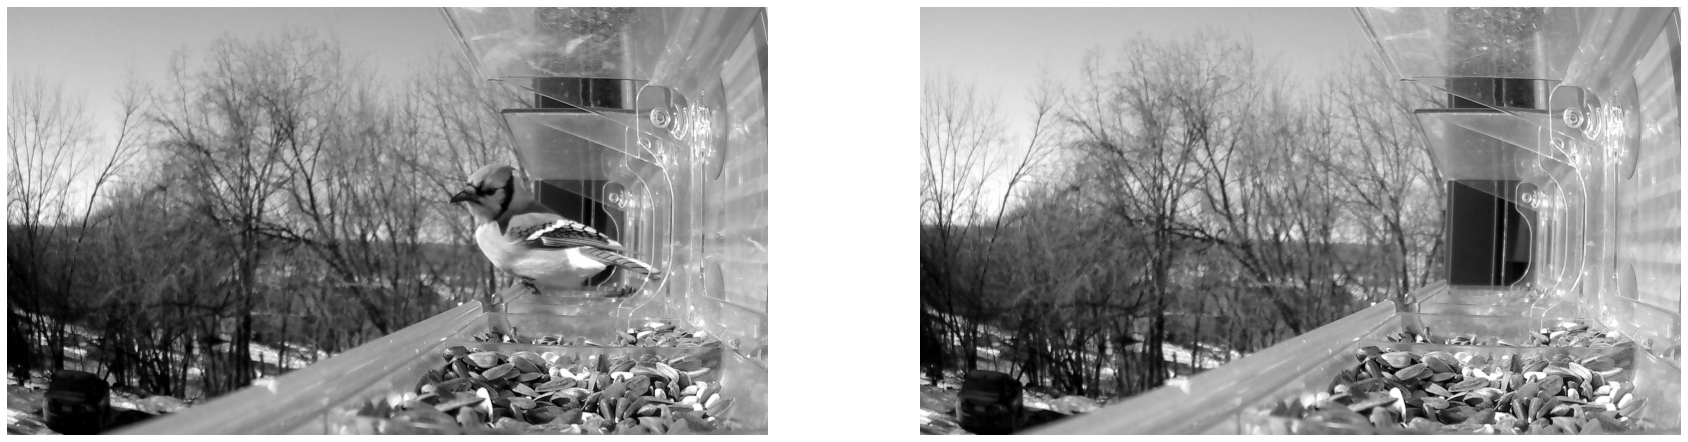

In [666]:
rootpath = r"C:\Users\Vedant Gannu\Documents\CSCI-4270-Computational_Vision\hw3\prob3_distribute\{}".format("pos_6")
images = [image for image in os.listdir(rootpath) if os.path.splitext(image)[1] == ".jpg"]
im0 = cv2.imread(os.path.join(rootpath, images[0]), cv2.IMREAD_GRAYSCALE).astype(float)
im1 = cv2.imread(os.path.join(rootpath, images[1]), cv2.IMREAD_GRAYSCALE).astype(float)
plt.gray()
plt.figure(figsize=(30,30))
plt.subplot(121)
plt.axis("off")
plt.imshow(im0)
plt.subplot(122)
plt.axis("off")
plt.imshow(im1)
plt.show()  

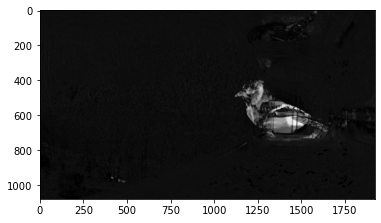

251.0 15.982133969907407 17.58197287606516 51.146079722037726


In [667]:
im_diff = np.abs(im0 - im1)
plt.imshow(im_diff)
plt.show()
max_diff = np.max(im_diff)
mean = np.average(im_diff)
std = np.std(im_diff)
thresh = mean + 2*std
print(max_diff, mean, std, thresh)

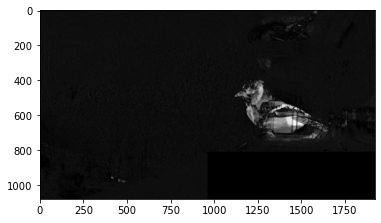

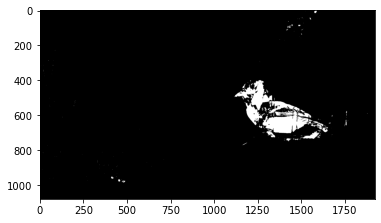

In [668]:
#Black out the foreground seed holder since seed distortion shouldn't be considered
im_diff[im1.shape[0]*3//4:im1.shape[0], im1.shape[1]//2:im1.shape[1]] = 0
plt.imshow(im_diff)
plt.show()

#im_diff = cv2.medianBlur(im_diff.astype("uint8"), ksize=5)

retval,im_thresh = cv2.threshold(im_diff.astype(np.uint8),thresh,255,cv2.THRESH_BINARY)
plt.imshow(im_thresh)
plt.show()

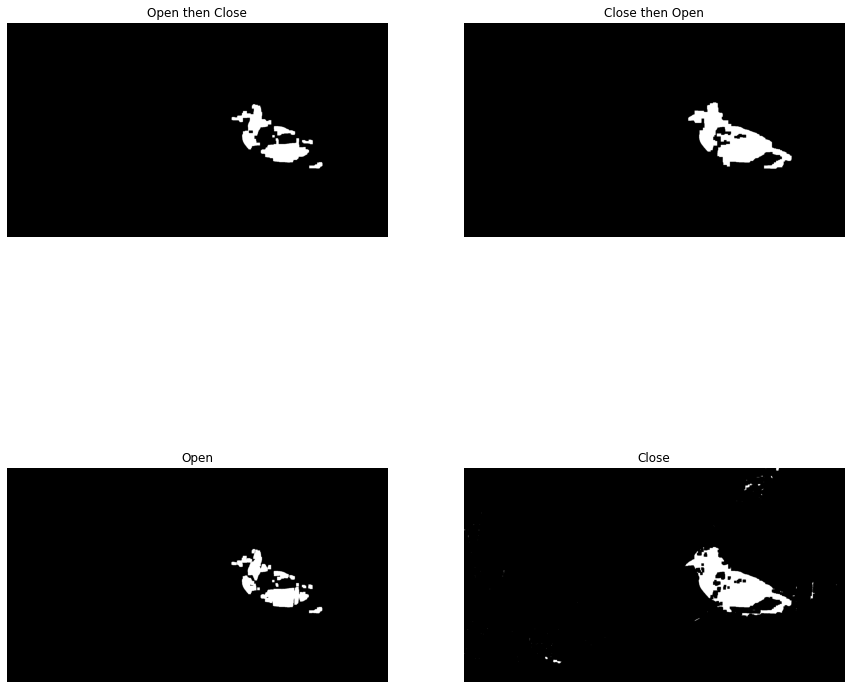

In [669]:
kernel = np.ones((12,12),np.uint8)

after_open = cv2.morphologyEx(im_thresh,cv2.MORPH_OPEN,kernel)
im_open_first = cv2.morphologyEx(after_open,cv2.MORPH_CLOSE,kernel)

after_close = cv2.morphologyEx(im_thresh,cv2.MORPH_CLOSE,kernel)
im_close_first = cv2.morphologyEx(after_close,cv2.MORPH_OPEN,kernel)

im_close_first = cv2.morphologyEx(im_close_first,cv2.MORPH_OPEN,np.ones((15,15),np.uint8))

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.axis("off")
plt.imshow(im_open_first)
plt.title("Open then Close")
plt.subplot(222)
plt.axis("off")
plt.imshow(im_close_first)
plt.title("Close then Open")


plt.subplot(223)
plt.axis("off")
plt.imshow(after_open)
plt.title("Open")
plt.subplot(224)
plt.axis("off")
plt.imshow(after_close)
plt.title("Close")


plt.show() 

In [670]:
'''
The next step is connected components labeling.  This function
returns four values as demonstrated in the code and output below.
'''
connectivity = 8
num_labels, labels, stats, centroids = \
    cv2.connectedComponentsWithStats(im_close_first, connectivity, cv2.CV_32S)#cv2.connectedComponentsWithStats(im_open_first, connectivity, cv2.CV_32S)
print('Number of connected components:', num_labels-1)  # the background is one of the "labels"
print('\nHere are the stats:')
print('Upper left and lower right pixel, plus area')
print(stats)
print('\nHere are the centroids')
print(centroids)

Number of connected components: 1

Here are the stats:
Upper left and lower right pixel, plus area
[[      0       0    1920    1080 2010329]
 [   1130     404     521     333   63271]]

Here are the centroids
[[ 946.80948889  537.84450306]
 [1362.71952395  592.10061482]]


In [274]:
colors = np.random.randint(255, size=(num_labels,3))
colors[0] = np.array((0,0,0))
print(colors)

[[  0   0   0]
 [236 239 167]]


(1080, 1920, 3) int32
1.0
1.0
[231.19778122]
[406.07571835]



'\nFinally, we will generate the colorized image.  We have not yet discussed this\nway of indexing a Numpy array.\n\nim_colored = colors[labels]\nprint(im_colored.shape, im_colored.dtype)\nplt.imshow(im_colored.astype(np.uint8))\nplt.show()\n'

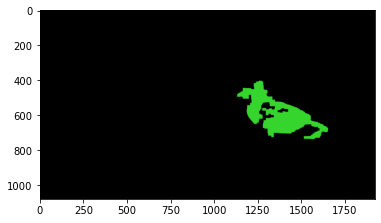

In [671]:
'''
Finally, we will generate the colorized image.  We have not yet discussed this
way of indexing a Numpy array.
'''

im_colored = colors[labels]
print(im_colored.shape, im_colored.dtype)
#plt.imshow(im_colored[:,im_colored.shape[1]//2:].astype(np.uint8))
plt.imshow(im_colored.astype(np.uint8))

lower_right_center_coords = np.tile(np.array([im_colored.shape[1]*3//4, im_colored.shape[0]*3//4]), (len(centroids), 1))
optical_center = np.tile(np.array([im_colored.shape[1]//2, im_colored.shape[0]//2]), (len(centroids), 1))

#print(np.square(np.sum(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)))
distances = np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)
to_right = np.sum(distances) / np.max(distances)
print(to_right)
distances = np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1)
to_center = np.sum(distances) / np.max(distances)
print(to_center)

print(np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1))
print(np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1))
print()

if to_right > to_center:

    pixel_ids, pixel_counts = np.unique(labels, return_counts=True)
    print(pixel_counts)
    ls = np.argwhere(pixel_counts > 4000).flatten().tolist()
    print(ls)

    for i in list(set(pixel_ids) - set(ls)):
        labels[np.where(labels == i)] = 0

    im_colored1 = colors[labels]

    plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.axis("off")
    plt.imshow(im_colored)
    plt.subplot(222)
    plt.axis("off")
    plt.imshow(im_colored1)


    new_slice = np.array(list(set(ls) - set([0])), dtype="int")

    distances = np.linalg.norm(centroids[new_slice,:] - lower_right_center_coords[new_slice,:], axis=1)
    print(np.sum(distances) / np.max(distances))
    distances = np.linalg.norm(centroids[new_slice,:] - optical_center[new_slice,:], axis=1)
    print(np.sum(distances) / np.max(distances))



#centroids - lower_right


#cv2.imshow("image", im_colored.astype("uint8"))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

    plt.show()

'''
Finally, we will generate the colorized image.  We have not yet discussed this
way of indexing a Numpy array.

im_colored = colors[labels]
print(im_colored.shape, im_colored.dtype)
plt.imshow(im_colored.astype(np.uint8))
plt.show()
'''

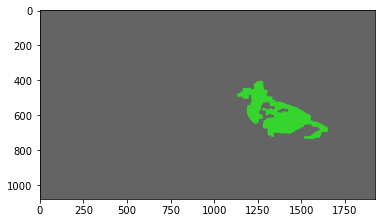

In [672]:
final = cv2.imread(os.path.join(rootpath, images[0]))
final[np.where(labels == 0)] = [100,100,100]
final[np.where(labels != 0)] = colors[1]
plt.imshow(final)

<Figure size 432x288 with 0 Axes>

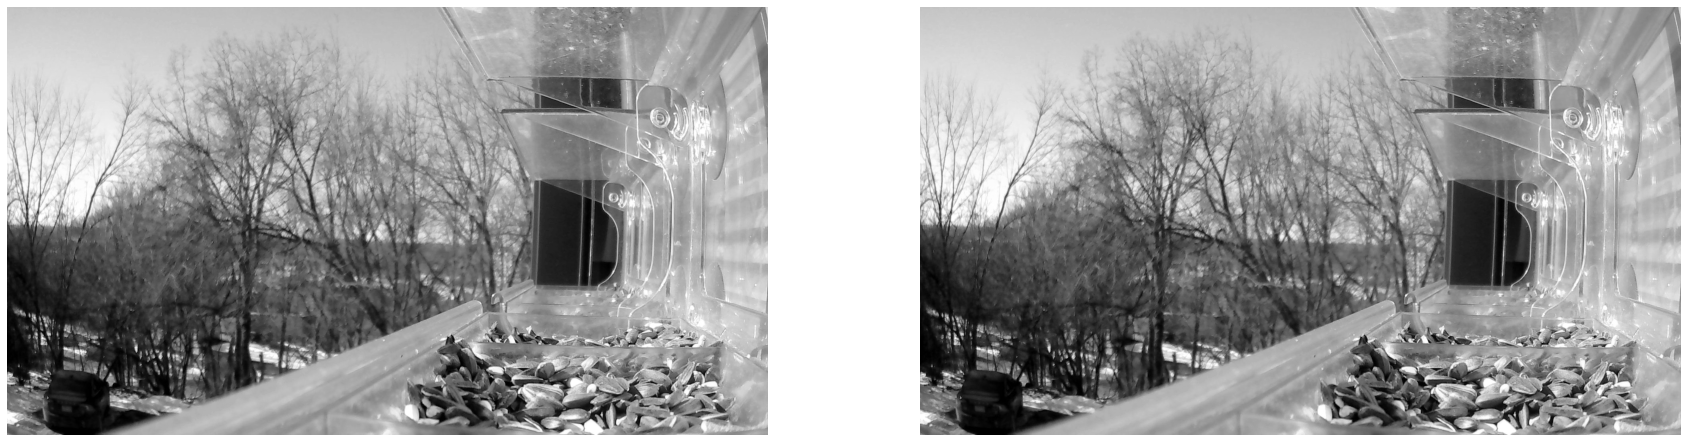

In [689]:
rootpath = r"C:\Users\Vedant Gannu\Documents\CSCI-4270-Computational_Vision\hw3\prob3_distribute\{}".format("neg_1")
images = [image for image in os.listdir(rootpath) if os.path.splitext(image)[1] == ".jpg"]
im0 = cv2.imread(os.path.join(rootpath, images[0]), cv2.IMREAD_GRAYSCALE).astype(float)
im1 = cv2.imread(os.path.join(rootpath, images[1]), cv2.IMREAD_GRAYSCALE).astype(float)

#center = (im1.shape[1]//2, im1.shape[0]*3//4)

#im1 = cv2.line(im1, center, (im1.shape[1]//2, im1.shape[1]-1), 255, 19)


plt.gray()
plt.figure(figsize=(30,30))
plt.subplot(121)
plt.axis("off")
plt.imshow(im0)
plt.subplot(122)
plt.axis("off")
plt.imshow(im1)
plt.show() 

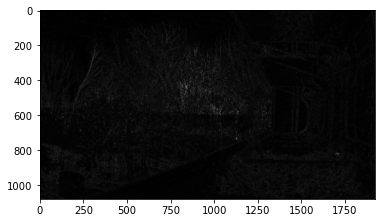

113.0 3.5373095100308642 4.36902609943681 12.275361708904484


In [690]:
im_diff = np.abs(im0 - im1)

plt.imshow(im_diff)
plt.show()
max_diff = np.max(im_diff)
mean = np.average(im_diff)
std = np.std(im_diff)
thresh = mean + 2*std
print(max_diff, mean, std, thresh)

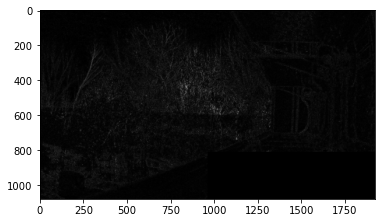

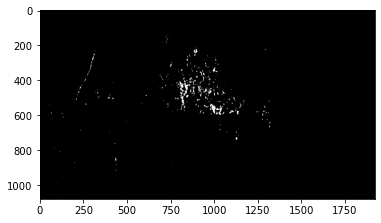

In [691]:
#Black out the foreground seed holder since seed distortion shouldn't be considered
im_diff[im1.shape[0]*3//4:im1.shape[0], im1.shape[1]//2:im1.shape[1]] = 0
plt.imshow(im_diff)
plt.show()

im_diff = cv2.medianBlur(im_diff.astype("uint8"), ksize=7)


retval,im_thresh = cv2.threshold(im_diff.astype(np.uint8),thresh,255,cv2.THRESH_BINARY)
plt.imshow(im_thresh)
plt.show()

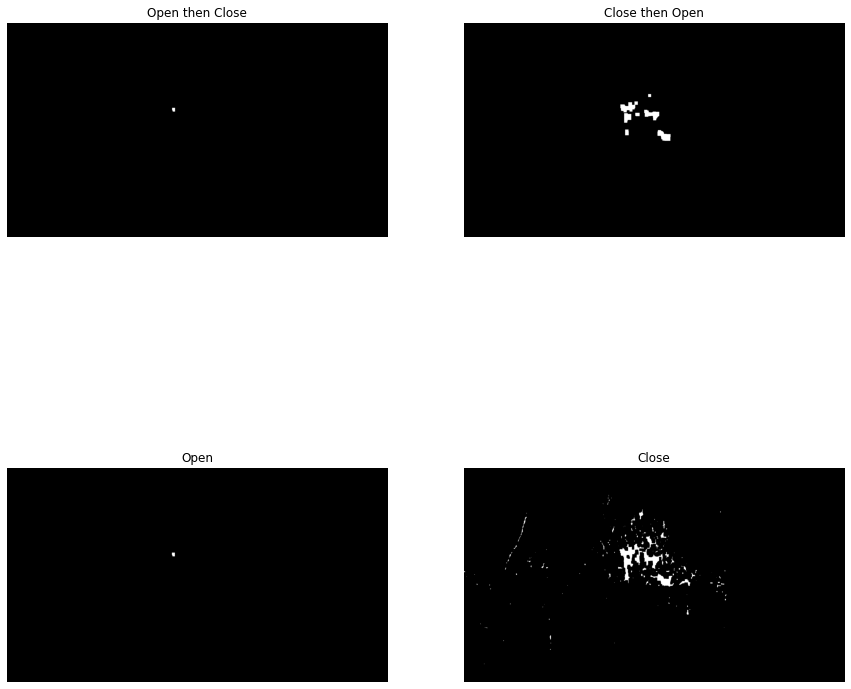

In [692]:
#im_diff = cv2.medianBlur(im_diff.astype("uint8"), ksize=5)
#im_diff = cv2.erode(im_diff,np.ones((5,5),np.uint8),iterations = 1)

kernel = np.ones((12,12),np.uint8)

after_open = cv2.morphologyEx(im_thresh,cv2.MORPH_OPEN,kernel)
im_open_first = cv2.morphologyEx(after_open,cv2.MORPH_CLOSE,kernel)

after_close = cv2.morphologyEx(im_thresh,cv2.MORPH_CLOSE,kernel)
im_close_first = cv2.morphologyEx(after_close,cv2.MORPH_OPEN,kernel)

im_close_first = cv2.morphologyEx(im_close_first,cv2.MORPH_OPEN,np.ones((15,15),np.uint8))


plt.figure(figsize=(15,15))
plt.subplot(221)
plt.axis("off")
plt.imshow(im_open_first)
plt.title("Open then Close")
plt.subplot(222)
plt.axis("off")
plt.imshow(im_close_first)
plt.title("Close then Open")


plt.subplot(223)
plt.axis("off")
plt.imshow(after_open)
plt.title("Open")
plt.subplot(224)
plt.axis("off")
plt.imshow(after_close)
plt.title("Close")


plt.show() 

In [693]:
'''
The next step is connected components labeling.  This function
returns four values as demonstrated in the code and output below.
'''
connectivity = 8
num_labels, labels, stats, centroids = \
    cv2.connectedComponentsWithStats(im_close_first, connectivity, cv2.CV_32S)#cv2.connectedComponentsWithStats(im_open_first, connectivity, cv2.CV_32S)
print('Number of connected components:', num_labels-1)  # the background is one of the "labels"
print('\nHere are the stats:')
print('Upper left and lower right pixel, plus area')
print(stats)
print('\nHere are the centroids')
print(centroids)

Number of connected components: 7

Here are the stats:
Upper left and lower right pixel, plus area
[[      0       0    1920    1080 2063854]
 [    928     362      15      15     225]
 [    788     399      88      55    2732]
 [    908     441      76      53    2257]
 [    863     456      22      17     369]
 [    807     458      36      48    1388]
 [    812     540      18      29     514]
 [    975     543      66      54    2261]]

Here are the centroids
[[ 959.77852794  539.76501826]
 [ 935.          369.        ]
 [ 829.1090776   426.79355783]
 [ 946.51617191  464.18785999]
 [ 873.63143631  463.89701897]
 [ 822.4092219   479.32708934]
 [ 820.36770428  554.16342412]
 [1008.01194162  571.86510394]]


In [694]:
colors = np.random.randint(255, size=(num_labels,3))
colors[0] = np.array((0,0,0))
print(colors)

[[  0   0   0]
 [154  20 135]
 [106  80 211]
 [ 80 151 132]
 [235   7 122]
 [102  13 173]
 [ 81  37  79]
 [136 113 197]]


(1080, 1920, 3) int32
4522.113871470501
886.3359587632539
[670.45208628 721.13445098 602.58802242 663.74740934 700.54474735
 670.37044644 493.27670866]
[172.81782315 173.0552863   77.00191032 115.11382417 150.37428073
 140.34878194  57.62405216]

[2063854     225    2732    2257     369    1388     514    2261]
[0]


ValueError: zero-size array to reduction operation maximum which has no identity

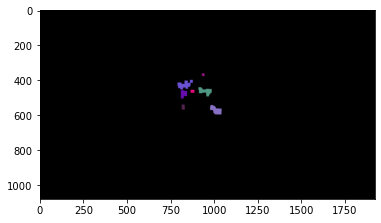

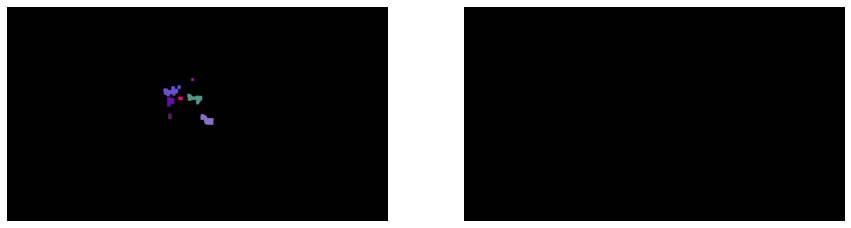

In [695]:
'''
Finally, we will generate the colorized image.  We have not yet discussed this
way of indexing a Numpy array.
'''

im_colored = colors[labels]
print(im_colored.shape, im_colored.dtype)
#plt.imshow(im_colored[:,im_colored.shape[1]//2:].astype(np.uint8))
plt.imshow(im_colored.astype(np.uint8))

lower_right_center_coords = np.tile(np.array([im_colored.shape[1]*3//4, im_colored.shape[0]*3//4]), (len(centroids), 1))
optical_center = np.tile(np.array([im_colored.shape[1]//2, im_colored.shape[0]//2]), (len(centroids), 1))

#print(np.square(np.sum(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)))
distances = np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)
to_right = np.sum(distances)
print(to_right)
distances = np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1)
to_center = np.sum(distances)
print(to_center)

print(np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1))
print(np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1))
print()

if to_right > to_center:

    pixel_ids, pixel_counts = np.unique(labels, return_counts=True)
    print(pixel_counts)
    
    ls = np.argwhere(pixel_counts > 4000).flatten().tolist()
    print(ls)
    
    if len(ls) == 0:
        print("No components left")

    for i in list(set(pixel_ids) - set(ls)):
        labels[np.where(labels == i)] = 0

    im_colored1 = colors[labels]

    plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.axis("off")
    plt.imshow(im_colored)
    plt.subplot(222)
    plt.axis("off")
    plt.imshow(im_colored1)


    new_slice = np.array(list(set(ls) - set([0])), dtype="int")

    distances = np.linalg.norm(centroids[new_slice,:] - lower_right_center_coords[new_slice,:], axis=1)
    
    print(np.sum(distances) / np.max(distances))
    distances = np.linalg.norm(centroids[new_slice,:] - optical_center[new_slice,:], axis=1)
    print(np.sum(distances) / np.max(distances))



#centroids - lower_right


#cv2.imshow("image", im_colored.astype("uint8"))
#cv2.waitKey(0)
#cv2.destroyAllWindows()

    plt.show()

'''
Finally, we will generate the colorized image.  We have not yet discussed this
way of indexing a Numpy array.

im_colored = colors[labels]
print(im_colored.shape, im_colored.dtype)




im_colored = colors[labels]
print(im_colored.shape, im_colored.dtype)
#plt.imshow(im_colored[:,im_colored.shape[1]//2:].astype(np.uint8))
plt.imshow(im_colored.astype(np.uint8))

lower_right_center_coords = np.tile(np.array([im_colored.shape[1]*3//4, im_colored.shape[0]*3//4]), (len(centroids), 1))
optical_center = np.tile(np.array([im_colored.shape[1]//2, im_colored.shape[0]//2]), (len(centroids), 1))

#print(np.square(np.sum(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)))
distances = np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1)
print(np.sum(distances) / np.max(distances))
distances = np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1)
print(np.sum(distances) / np.max(distances))

print(np.linalg.norm(centroids[1:,:] - lower_right_center_coords[1:,:], axis=1))
print(np.linalg.norm(centroids[1:,:] - optical_center[1:,:], axis=1))



plt.imshow(im_colored.astype(np.uint8))
plt.show()
'''

<Figure size 432x288 with 0 Axes>

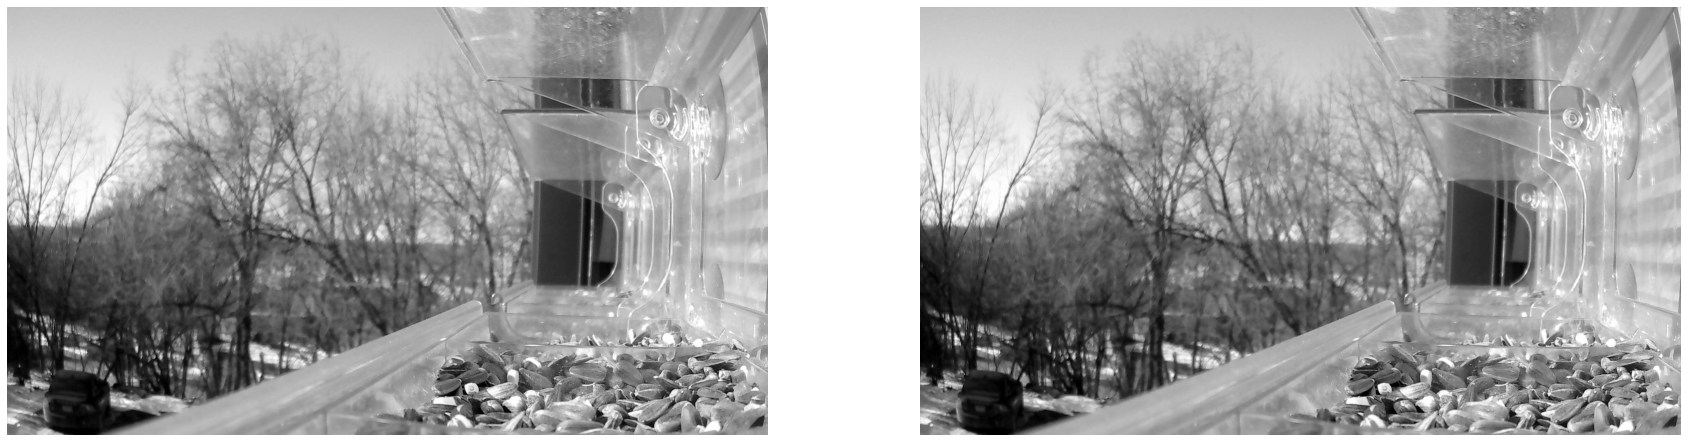

In [380]:
rootpath = r"C:\Users\Vedant Gannu\Documents\CSCI-4270-Computational_Vision\hw3\prob3_distribute\{}".format("neg_4")
images = [image for image in os.listdir(rootpath) if os.path.splitext(image)[1] == ".jpg"]
im0 = cv2.imread(os.path.join(rootpath, images[0]), cv2.IMREAD_GRAYSCALE).astype(float)
im1 = cv2.imread(os.path.join(rootpath, images[1]), cv2.IMREAD_GRAYSCALE).astype(float)

#center = (im1.shape[1]//2, im1.shape[0]*3//4)

#im1 = cv2.line(im1, center, (im1.shape[1]//2, im1.shape[1]-1), 255, 19)


plt.gray()
plt.figure(figsize=(30,30))
plt.subplot(121)
plt.axis("off")
plt.imshow(im0)
plt.subplot(122)
plt.axis("off")
plt.imshow(im1)
plt.show() 

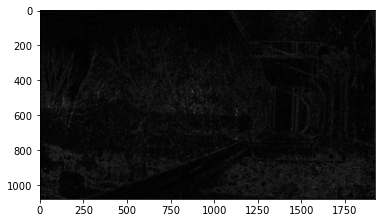

67.0 2.7453047839506173 3.214171897604989 9.173648579160595


In [381]:
im_diff = np.abs(im0 - im1)

plt.imshow(im_diff)
plt.show()
max_diff = np.max(im_diff)
mean = np.average(im_diff)
std = np.std(im_diff)
thresh = mean + 2*std
print(max_diff, mean, std, thresh)

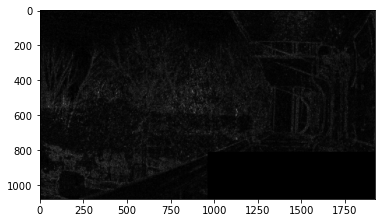

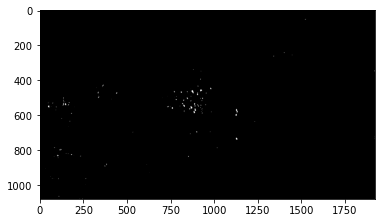

In [382]:
#Black out the foreground seed holder since seed distortion shouldn't be considered
im_diff[im1.shape[0]*3//4:im1.shape[0], im1.shape[1]//2:im1.shape[1]] = 0
plt.imshow(im_diff)
plt.show()

im_diff = cv2.medianBlur(im_diff.astype("uint8"), ksize=7)


retval,im_thresh = cv2.threshold(im_diff.astype(np.uint8),thresh,255,cv2.THRESH_BINARY)
plt.imshow(im_thresh)
plt.show()

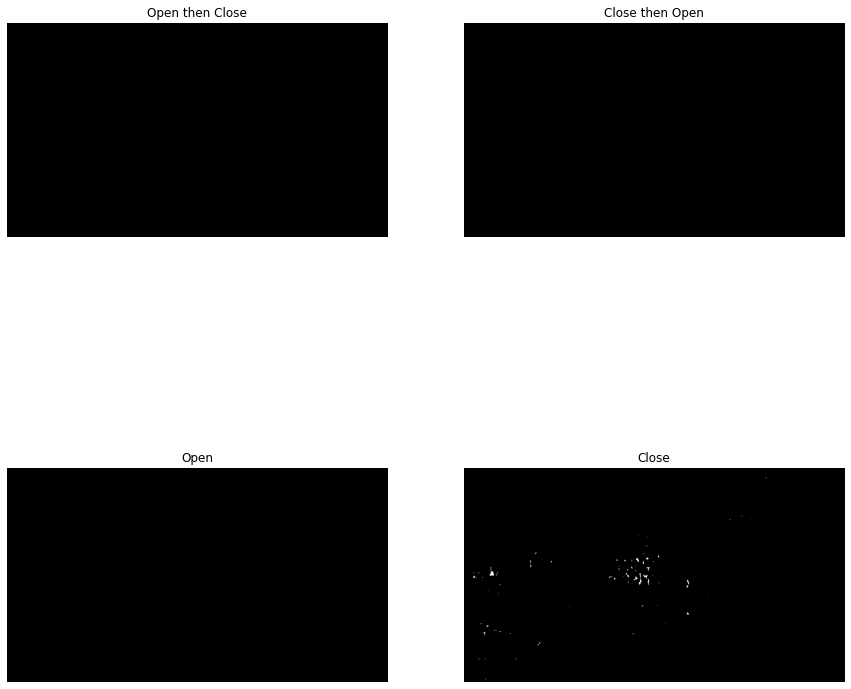

In [383]:
#im_diff = cv2.medianBlur(im_diff.astype("uint8"), ksize=5)
#im_diff = cv2.erode(im_diff,np.ones((5,5),np.uint8),iterations = 1)

kernel = np.ones((12,12),np.uint8)

after_open = cv2.morphologyEx(im_thresh,cv2.MORPH_OPEN,kernel)
im_open_first = cv2.morphologyEx(after_open,cv2.MORPH_CLOSE,kernel)

after_close = cv2.morphologyEx(im_thresh,cv2.MORPH_CLOSE,kernel)
im_close_first = cv2.morphologyEx(after_close,cv2.MORPH_OPEN,kernel)

im_close_first = cv2.morphologyEx(im_close_first,cv2.MORPH_OPEN,np.ones((15,15),np.uint8))


plt.figure(figsize=(15,15))
plt.subplot(221)
plt.axis("off")
plt.imshow(im_open_first)
plt.title("Open then Close")
plt.subplot(222)
plt.axis("off")
plt.imshow(im_close_first)
plt.title("Close then Open")


plt.subplot(223)
plt.axis("off")
plt.imshow(after_open)
plt.title("Open")
plt.subplot(224)
plt.axis("off")
plt.imshow(after_close)
plt.title("Close")


plt.show() 

In [384]:
'''
The next step is connected components labeling.  This function
returns four values as demonstrated in the code and output below.
'''
connectivity = 8
num_labels, labels, stats, centroids = \
    cv2.connectedComponentsWithStats(im_close_first, connectivity, cv2.CV_32S)#cv2.connectedComponentsWithStats(im_open_first, connectivity, cv2.CV_32S)
print('Number of connected components:', num_labels-1)  # the background is one of the "labels"
print('\nHere are the stats:')
print('Upper left and lower right pixel, plus area')
print(stats)
print('\nHere are the centroids')
print(centroids)

Number of connected components: 0

Here are the stats:
Upper left and lower right pixel, plus area
[[      0       0    1920    1080 2073600]]

Here are the centroids
[[959.5 539.5]]
